# Import neccesary libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

#train test split the data using sklearn
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

#Import libraries to implement linear regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

#cross validation
from sklearn.model_selection import cross_val_score

#import Bagging and DT
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

#import SVM Classifier and GridsearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [12]:
df = pd.read_csv('/content/drive/MyDrive/medical_data.csv')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df.describe()

,age,exercise,genetic_risk,blood_pressure,stress,sleep_quality,hospitalizations,chronic_conditions
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.808000,2.950000,-0.006483,28.127633,0.017164,7.999235,2.010000,1.028000
std,17.763859,1.989336,0.194765,19.122849,1.578746,0.144587,1.408504,0.813559
min,20.000000,0.000000,-0.569005,-0.393567,-4.630598,7.525935,0.000000,0.000000
25%,34.000000,1.000000,-0.137627,18.188146,-0.971343,7.899780,1.000000,0.000000
50%,50.000000,3.000000,-0.003972,25.872212,-0.049626,7.999666,2.000000,1.000000
75%,66.000000,5.000000,0.129921,34.068329,1.133850,8.095584,3.000000,2.000000
max,79.000000,6.000000,0.705167,187.000000,5.308932,8.443287,4.000000,2.000000


In [15]:
df.head()

,age,exercise,genetic_risk,blood_pressure,stress,sleep_quality,hospitalizations,chronic_conditions,medication_use,income_level,education_level,location,smoking_status,alcohol_consumption,diet_quality
0,45,2,0.268410,23.456894,1.063661,7.968123,1,2,OTC,High,High School,Rural,Current,Heavy,Unhealthy
1,54,1,0.149509,21.696553,2.516430,8.094984,0,0,OTC,High,High School,Urban,Never,Moderate,Unhealthy
2,50,0,-0.039173,24.754961,-0.041089,7.979968,0,0,None,Low,High School,Urban,Former,None,Unhealthy
3,69,6,-0.299879,33.287607,0.348526,7.943382,4,0,OTC,Medium,Postgraduate,Rural,Never,Moderate,Unhealthy
4,44,5,-0.472194,23.110150,1.842184,7.873233,1,2,None,Medium,Postgraduate,Rural,Never,Moderate,Unhealthy


In [16]:
print(df.isnull().sum())

age                    0
exercise               0
genetic_risk           0
blood_pressure         0
stress                 0
sleep_quality          0
hospitalizations       0
chronic_conditions     0
medication_use         0
income_level           0
education_level        0
location               0
smoking_status         0
alcohol_consumption    0
diet_quality           0
dtype: int64


In [17]:
df.shape

(1000, 15)

In [18]:
X = df.drop(columns=['diet_quality'])
y = df['diet_quality']

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Perform Label Encoding for categorical columns
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['diet_quality'])
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column])

# EDA Analysis

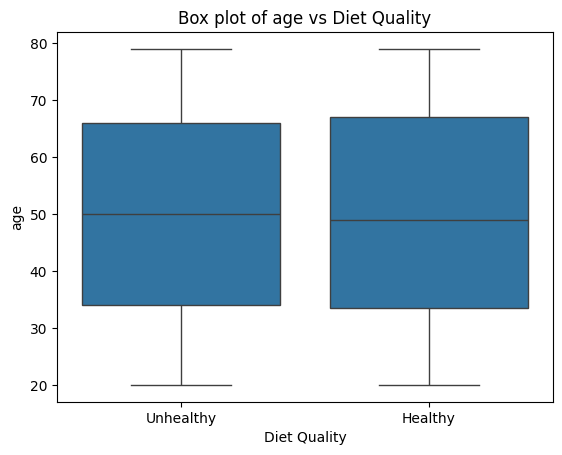

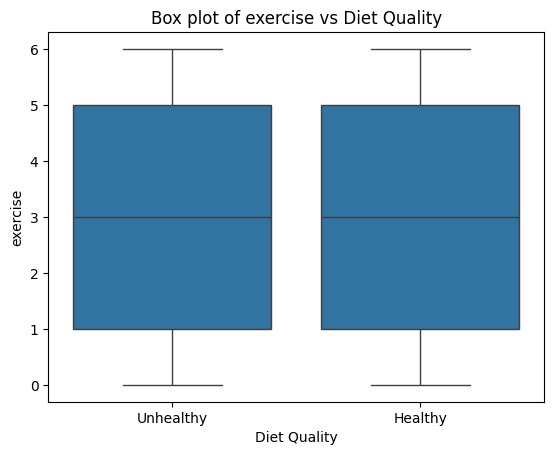

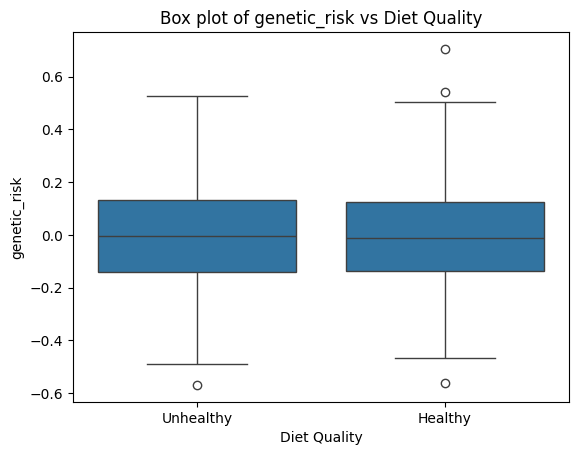

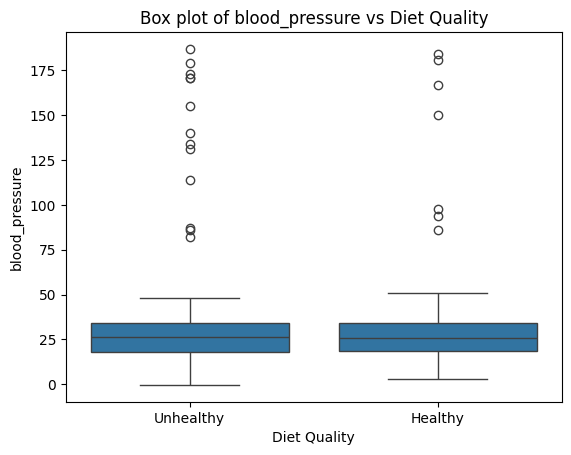

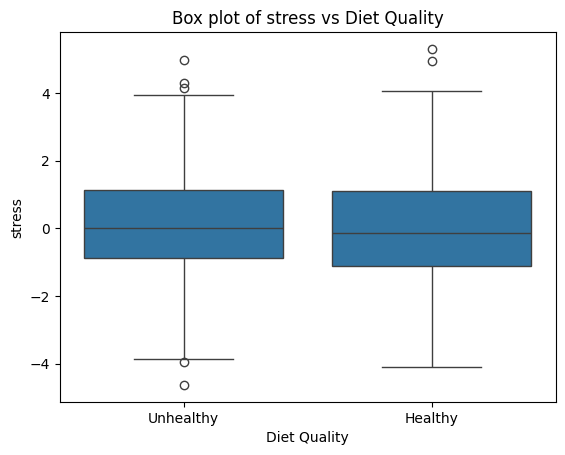

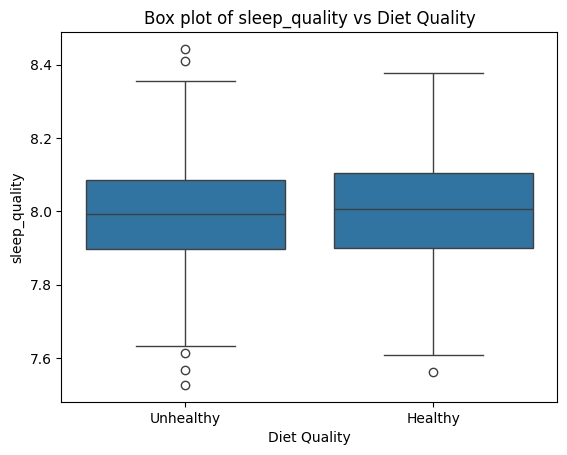

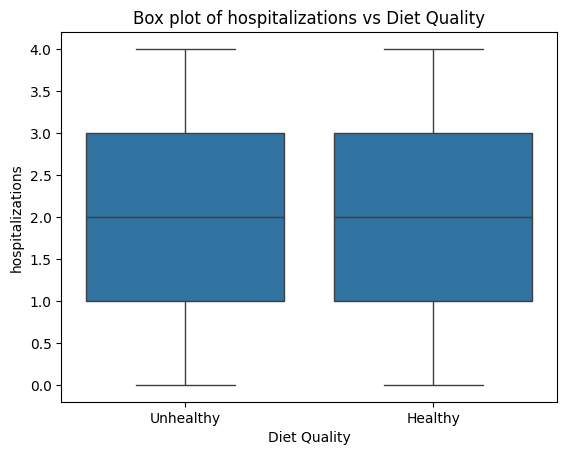

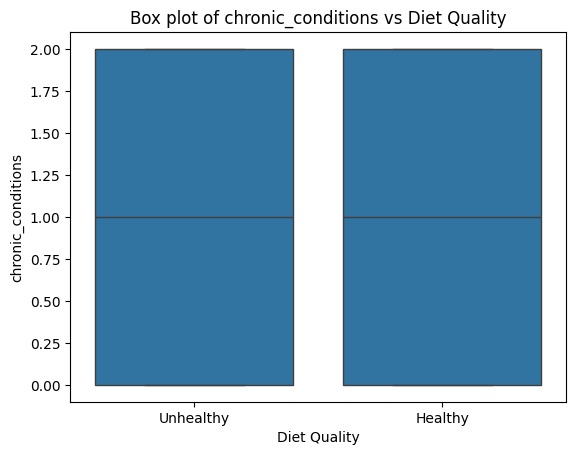

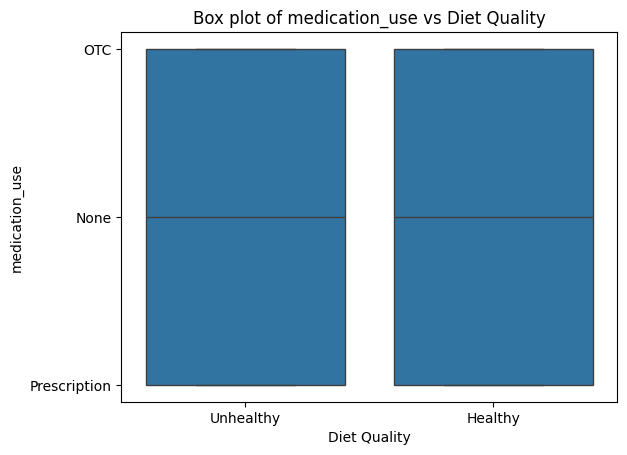

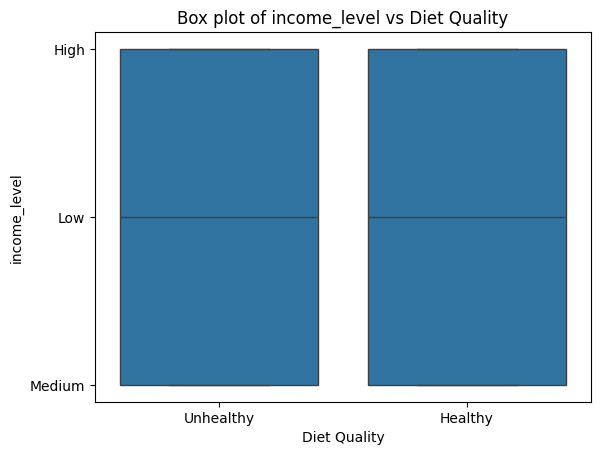

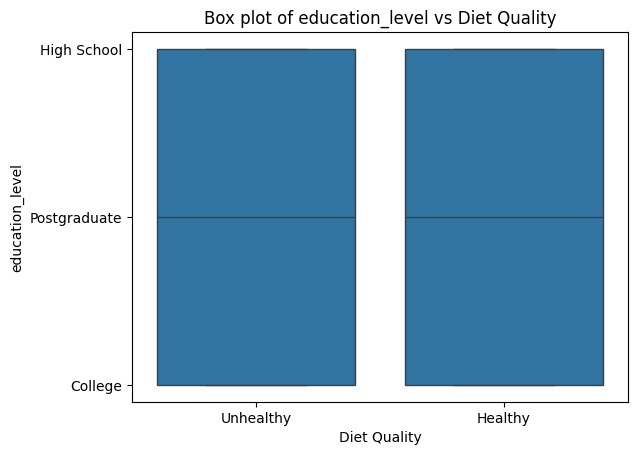

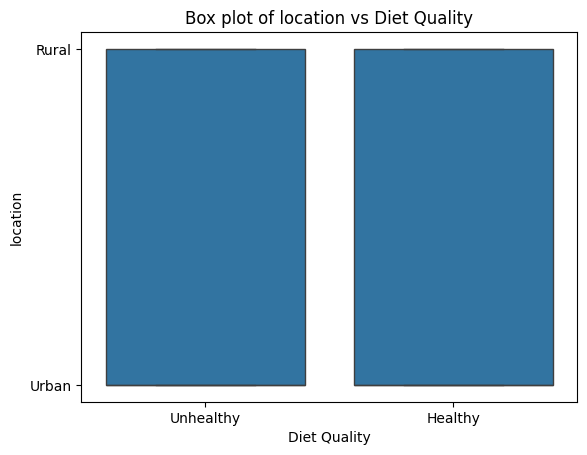

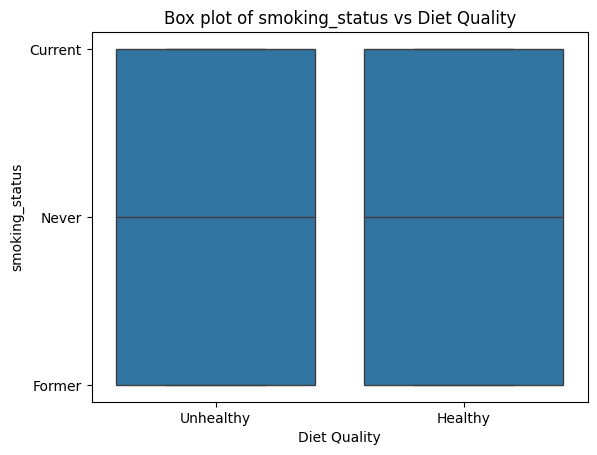

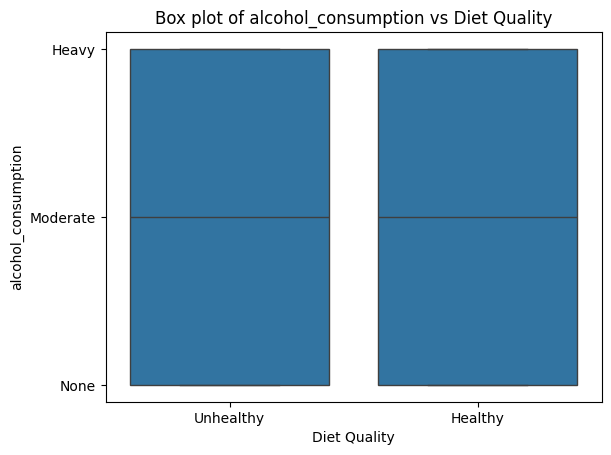

In [19]:
for column in df.columns[:-1]:
    sns.boxplot(y=df[column], x=df['diet_quality'])
    plt.ylabel(column)
    plt.xlabel('Diet Quality')
    plt.title(f'Box plot of {column} vs Diet Quality')
    plt.show()

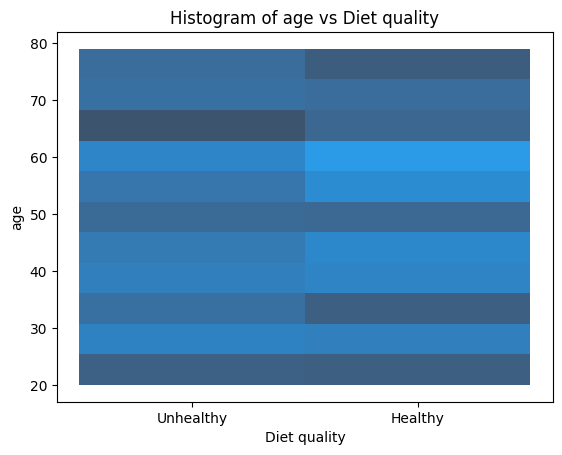

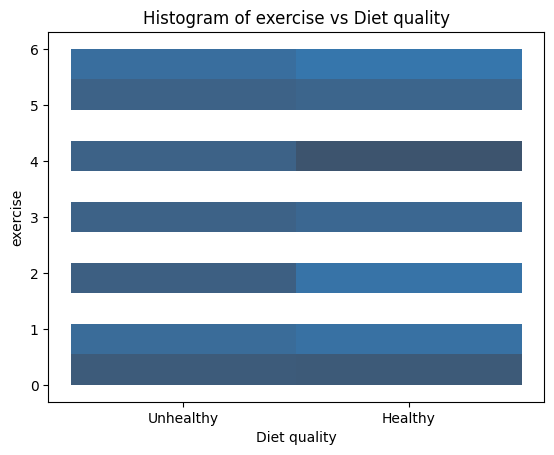

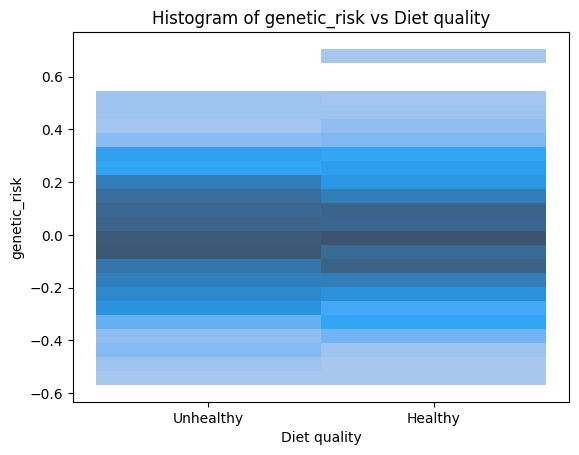

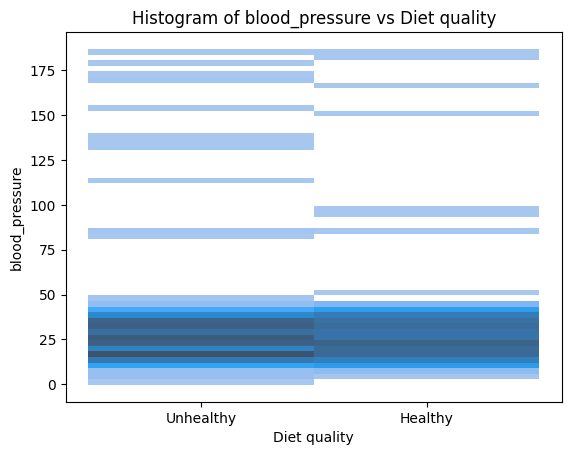

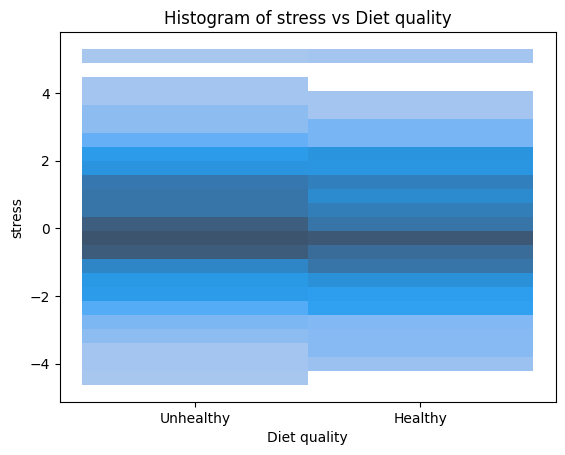

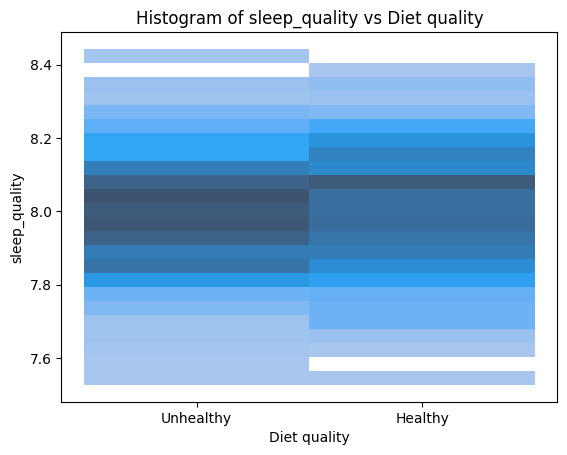

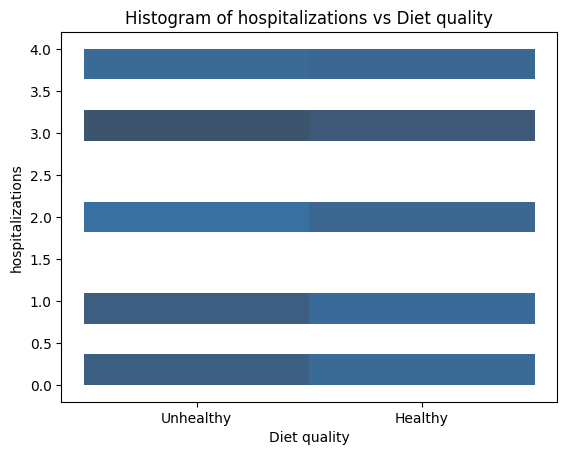

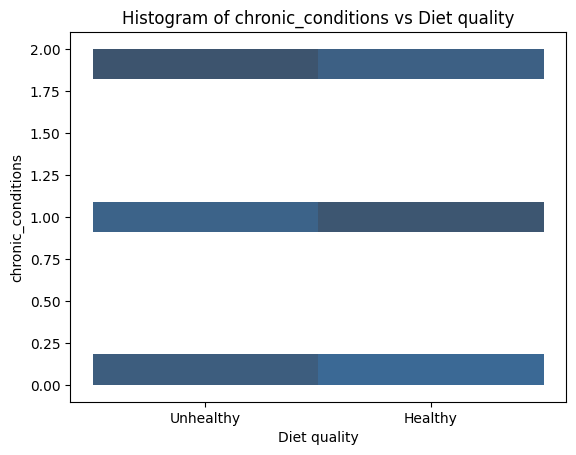

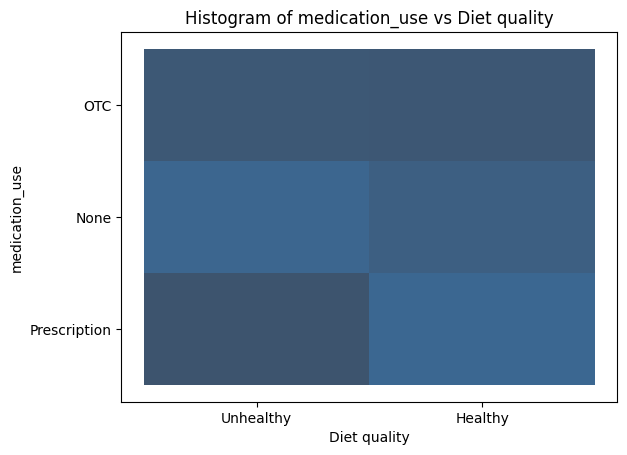

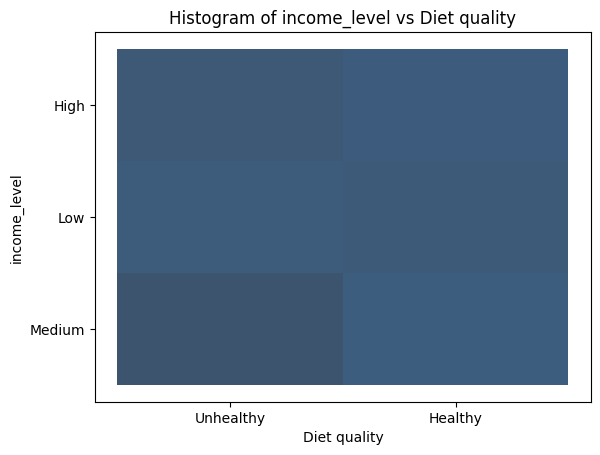

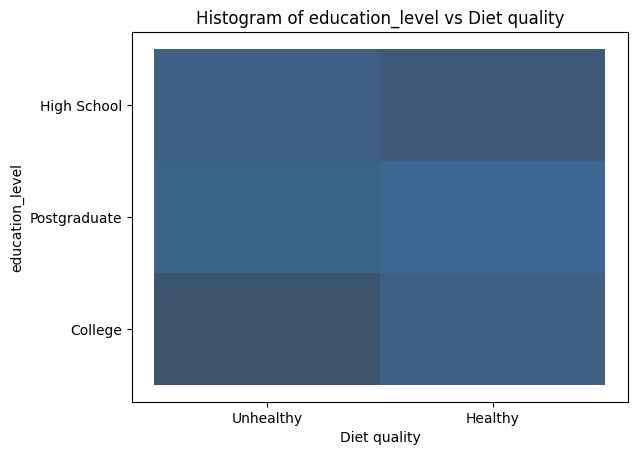

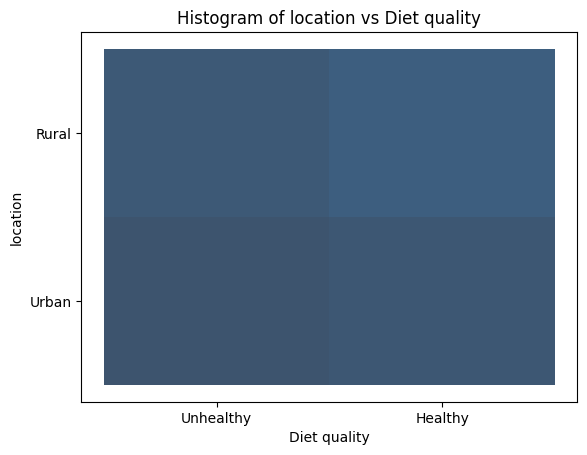

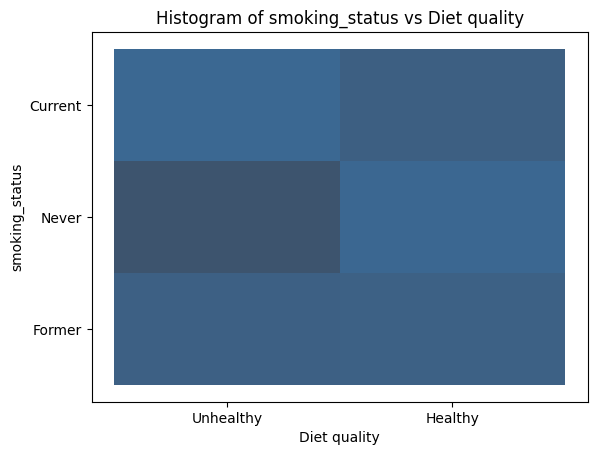

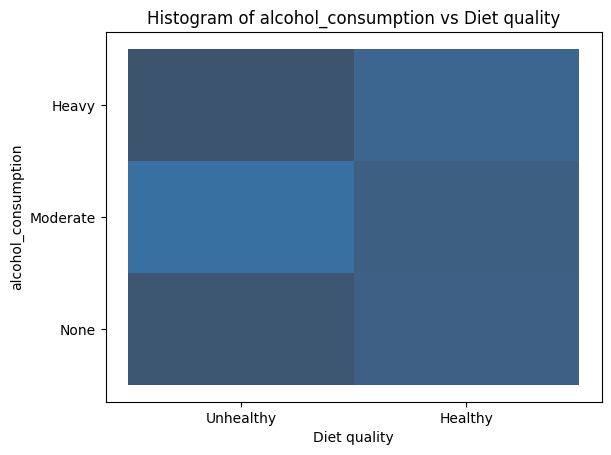

In [20]:
for column in df.columns[:-1]:
    sns.histplot(y=df[column], x=df['diet_quality'])
    plt.ylabel(column)
    plt.xlabel('Diet quality')
    plt.title(f'Histogram of {column} vs Diet quality')
    plt.show()

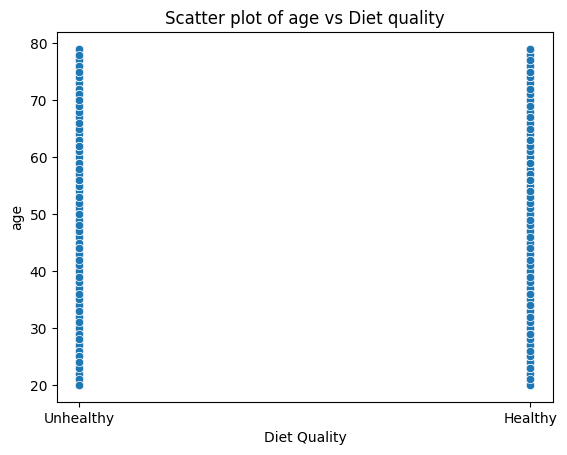

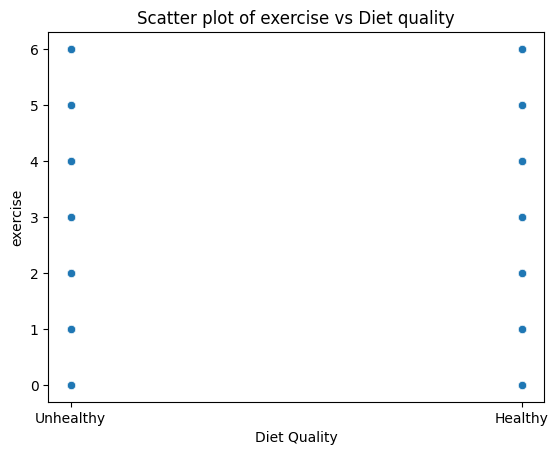

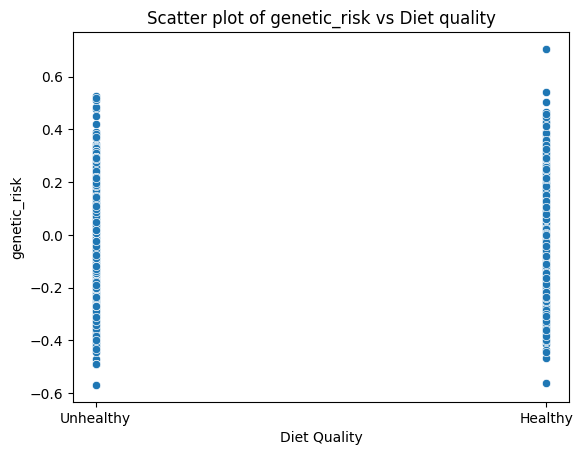

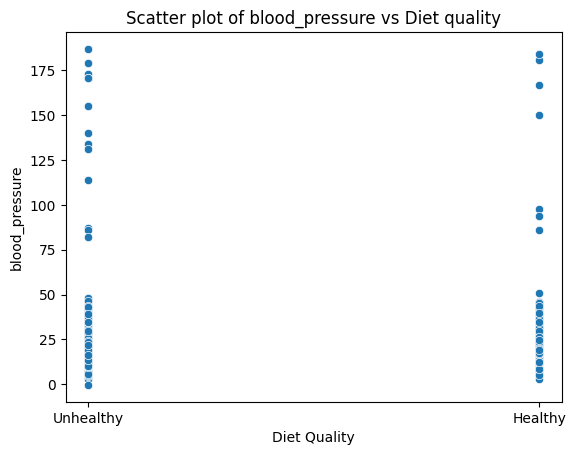

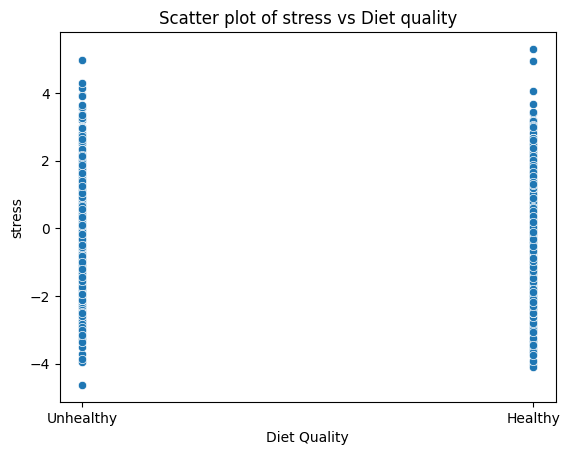

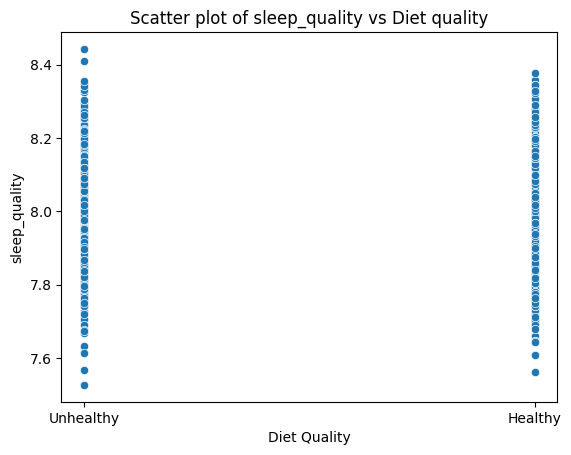

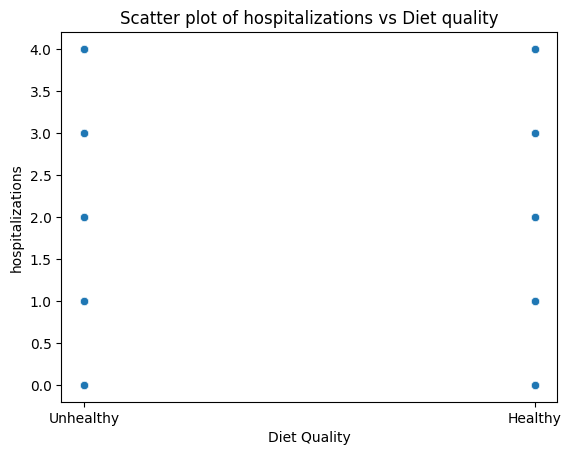

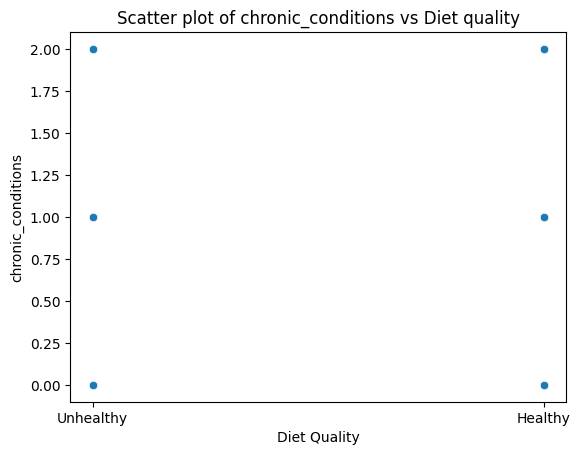

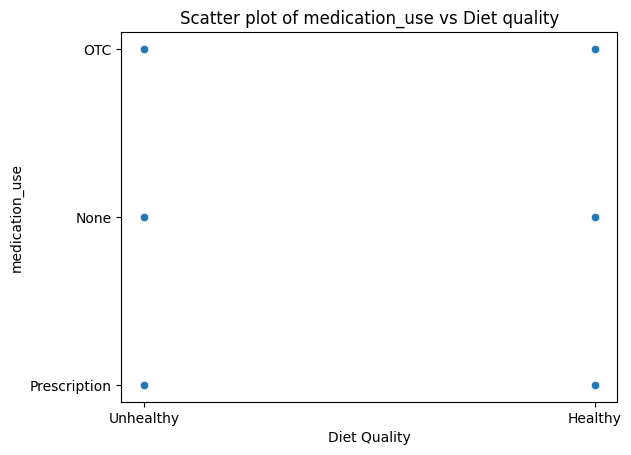

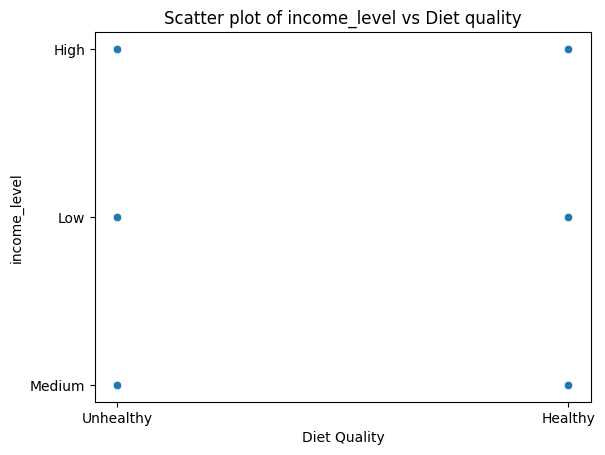

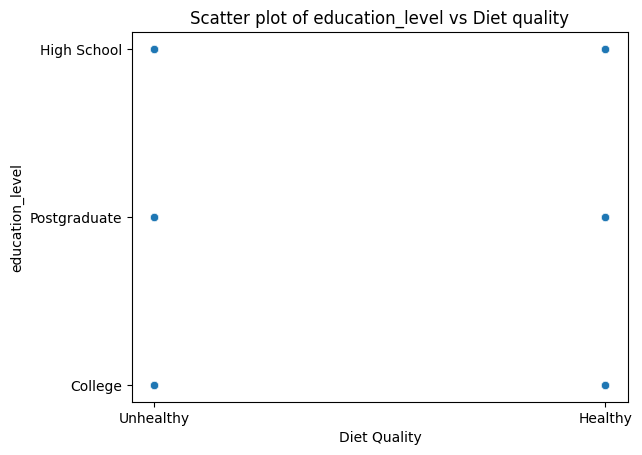

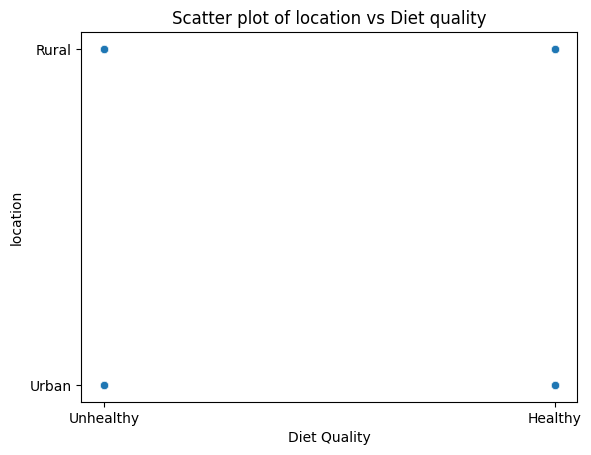

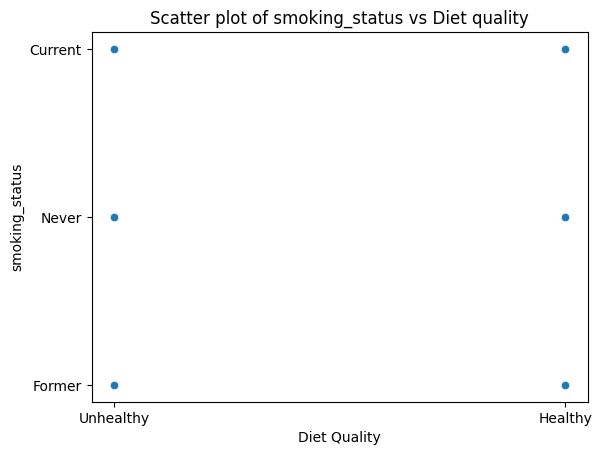

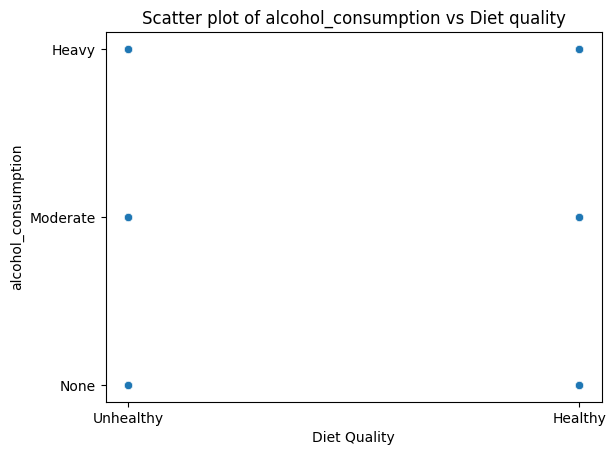

In [21]:
for column in df.columns[:-1]:
    sns.scatterplot(y=df[column], x=df['diet_quality'])
    plt.ylabel(column)
    plt.xlabel('Diet Quality')
    plt.title(f'Scatter plot of {column} vs Diet quality')
    plt.show()

# Correlation Matrix

<ipython-input-22-7841071d9def>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


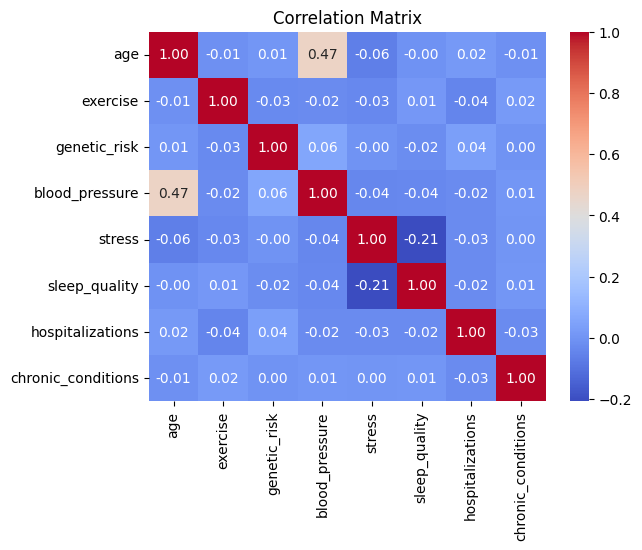

In [22]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Encoding

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Without Data Scaling

In [24]:
# Create a Linear Regression model
lr = LinearRegression()

# Train the regression model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression without scaling MSE: {mse:.2f}")
print(f"Linear Regression without scaling RMSE: {rmse:.2f}")
print(f"Linear Regression without scaling R2 Score: {r2:.2f}")

Linear Regression without scaling MSE: 0.26
Linear Regression without scaling RMSE: 0.51
Linear Regression without scaling R2 Score: -0.03


In [25]:
# Create and train the Lasso regression model
alpha = 0.01  # Regularization strength (you can adjust this)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Lasso Regression without scaling MSE: {mse:.2f}")
print(f"Lasso Regression without scaling RMSE: {rmse:.2f}")
print(f"Lasso Regression without scaling R2 Score: {r2:.2f}")

Lasso Regression without scaling MSE: 0.25
Lasso Regression without scaling RMSE: 0.50
Lasso Regression without scaling R2 Score: -0.02


In [26]:
# Create and train the Ridge regression model
alpha = 1.0  # Regularization strength (you can adjust this)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression without scaling MSE: {mse:.2f}")
print(f"Ridge Regression without scaling RMSE: {rmse:.2f}")
print(f"Ridge Regression without scaling R2 Score: {r2:.2f}")

Ridge Regression without scaling MSE: 0.26
Ridge Regression without scaling RMSE: 0.51
Ridge Regression without scaling R2 Score: -0.03


In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Naive Bayes without scaling MSE: {mse:.2f}")
print(f"Naive Bayes without scaling RMSE: {rmse:.2f}")
print(f"Naive Bayes without scaling R2 Score: {r2:.2f}")

Naive Bayes without scaling MSE: 0.53
Naive Bayes without scaling RMSE: 0.73
Naive Bayes without scaling R2 Score: -1.11


In [28]:
# Create a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=63)

# Train the regression model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest without scaling MSE: {mse:.2f}")
print(f"Random Forest without scaling RMSE: {rmse:.2f}")
print(f"Random Forest without scaling R2 Score: {r2:.2f}")

Random Forest without scaling MSE: 0.26
Random Forest without scaling RMSE: 0.51
Random Forest without scaling R2 Score: -0.04


In [29]:
# Create a gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=63)

# Train the regression model on the training data
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting without scaling MSE: {mse:.2f}")
print(f"Gradient Boosting without scaling RMSE: {rmse:.2f}")
print(f"Gradient Boosting without scaling R2 Score: {r2:.2f}")

Gradient Boosting without scaling MSE: 0.28
Gradient Boosting without scaling RMSE: 0.53
Gradient Boosting without scaling R2 Score: -0.11


In [30]:
# Create and train the HuberRegressor model
epsilon = 1.35  # The parameter epsilon determines the threshold for outliers
huber_model = HuberRegressor(epsilon=epsilon)
huber_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = huber_model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Huber Regressor without scaling MSE: {mse:.2f}")
print(f"Huber Regressor without scaling RMSE: {rmse:.2f}")
print(f"Huber Regressor without scaling R2 Score: {r2:.2f}")

Huber Regressor without scaling MSE: 0.26
Huber Regressor without scaling RMSE: 0.51
Huber Regressor without scaling R2 Score: -0.03


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Using Data Scaling

In [31]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Create a Linear Regression model
lrd = LinearRegression()

# Train the regression model on the training data
lrd.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lrd.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression with scaling MSE: {mse:.2f}")
print(f"Linear Regression with scaling RMSE: {rmse:.2f}")
print(f"Linear Regression with scaling R2 Score: {r2:.2f}")

Linear Regression with scaling MSE: 0.26
Linear Regression with scaling RMSE: 0.51
Linear Regression with scaling R2 Score: -0.03


In [33]:
# Create and train the Lasso regression model
alpha = 0.01  # Regularization strength (you can adjust this)
lasso_modeld = Lasso(alpha=alpha)
lasso_modeld.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_modeld.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Lasso Regression with scaling MSE: {mse:.2f}")
print(f"Lasso Regression with scaling RMSE: {rmse:.2f}")
print(f"Lasso Regression with scaling R2 Score: {r2:.2f}")

Lasso Regression with scaling MSE: 0.25
Lasso Regression with scaling RMSE: 0.50
Lasso Regression with scaling R2 Score: -0.01


In [34]:
# Create and train the Ridge regression model
alpha = 1.0  # Regularization strength (you can adjust this)
ridge_modeld = Ridge(alpha=alpha)
ridge_modeld.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_modeld.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression with scaling MSE: {mse:.2f}")
print(f"Ridge Regression with scaling RMSE: {rmse:.2f}")
print(f"Ridge Regression with scaling R2 Score: {r2:.2f}")

Ridge Regression with scaling MSE: 0.26
Ridge Regression with scaling RMSE: 0.51
Ridge Regression with scaling R2 Score: -0.03


In [35]:
nbd = GaussianNB()

# Train the classifier
nbd.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = nbd.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Naive Bayes with scaling MSE: {mse:.2f}")
print(f"Naive Bayes with scaling RMSE: {rmse:.2f}")
print(f"Naive Bayes with scaling R2 Score: {r2:.2f}")

Naive Bayes with scaling MSE: 0.53
Naive Bayes with scaling RMSE: 0.73
Naive Bayes with scaling R2 Score: -1.11


In [36]:
# Create a Random Forest model
rfd = RandomForestRegressor(n_estimators=100, random_state=63)

# Train the regression model on the training data
rfd.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rfd.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest with scaling MSE: {mse:.2f}")
print(f"Random Forest with scaling RMSE: {rmse:.2f}")
print(f"Random Forest with scaling R2 Score: {r2:.2f}")

Random Forest with scaling MSE: 0.26
Random Forest with scaling RMSE: 0.51
Random Forest with scaling R2 Score: -0.04


In [37]:
# Create a gradient Boosting model
gbd = GradientBoostingRegressor(n_estimators=100, random_state=63)

# Train the regression model on the training data
gbd.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gbd.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting with scaling MSE: {mse:.2f}")
print(f"Gradient Boosting with scaling RMSE: {rmse:.2f}")
print(f"Gradient Boosting with scaling R2 Score: {r2:.2f}")

Gradient Boosting with scaling MSE: 0.28
Gradient Boosting with scaling RMSE: 0.53
Gradient Boosting with scaling R2 Score: -0.12


In [38]:
# Create and train the HuberRegressor model
epsilon = 1.35  # The parameter epsilon determines the threshold for outliers
hd = HuberRegressor(epsilon=epsilon)
hd.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = hd.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Huber Regressor with scaling MSE: {mse:.2f}")
print(f"Huber Regressor with scaling RMSE: {rmse:.2f}")
print(f"Huber Regressor with scaling R2 Score: {r2:.2f}")

Huber Regressor with scaling MSE: 0.26
Huber Regressor with scaling RMSE: 0.51
Huber Regressor with scaling R2 Score: -0.03


# Conclusion: Model is underfit

### Fit the Regularization models as well

# Hyper Parameter Tuning

In [43]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': [0.1, 1, 'scale', 'auto'],
}

# Create an SVM classifier
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: {:.2f}%".format(grid_search.best_score_ * 100))

# Evaluate the model on the test set
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Hyperparameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score: 52.57%
Test Accuracy: 46.33%
